In [1]:
import pandas as pd
import numpy as np 
import pylab

In [2]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plot

In [3]:
playersDataset = pd.read_csv("LaLiga_Players_2122.csv")
playersDataset.head()

,competition,player.url,id,slug,name,nickname,firstname,lastname,gender,date_of_birth,...,unsuccessful_crosses_open_play,unsuccessful_dribbles,unsuccessful_launches,unsuccessful_layoffs,unsuccessful_long_passes,unsuccessful_passes_opposition_half,unsuccessful_passes_own_half,unsuccessful_short_passes,winning_goal,yellow_cards
0,LaLiga Santander,https://www.laliga.com/en-ES/player/aaron,1307,aaron,Aarón Escandell,Aarón,Aarón,Escandell,male,1995-09-27T00:00:00+00:00,...,NaN,NaN,21.0,NaN,55.0,49.0,7.0,1.0,0.0,1.0
1,LaLiga Santander,https://www.laliga.com/en-ES/player/abqar,8715,abqar,Abdelkabir Abqar,Abqar,Abdelkabir,Abqar,male,1999-03-10T00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LaLiga Santander,https://www.laliga.com/en-ES/player/abdessamad...,13770,abdessamad-ezzalzouli,Abdessamad Ezzalzouli,Abde,Abdessamad,Ezzalzouli,male,2001-12-17T00:00:00+00:00,...,13.0,25.0,NaN,NaN,NaN,45.0,8.0,40.0,0.0,4.0
3,LaLiga Santander,https://www.laliga.com/en-ES/player/abdon,200,abdon,Abdón Prats,Abdon,Abdón,Prats,male,1992-12-07T00:00:00+00:00,...,2.0,4.0,1.0,4.0,2.0,41.0,11.0,48.0,1.0,4.0
4,LaLiga Santander,https://www.laliga.com/en-ES/player/adama,536,adama,Adama Traoré,Adama,Adama,Traoré,male,1996-01-25T00:00:00+00:00,...,27.0,11.0,1.0,NaN,1.0,40.0,6.0,18.0,0.0,NaN


In [4]:
playersDatasetMinimized = playersDataset[['competition', 'name', 'gender', 'team', 'position', 'games_played', 'goal_assists', 'goals', 'home_goals', 'yellow_cards', 'duels', 'duels_lost', 'duels_won', 'aerial_duels', 'tackles_lost']]
playersDatasetMinimized.head()

,competition,name,gender,team,position,games_played,goal_assists,goals,home_goals,yellow_cards,duels,duels_lost,duels_won,aerial_duels,tackles_lost
0,LaLiga Santander,Aarón Escandell,male,Granada CF,Goalkeeper,4.0,NaN,NaN,0.0,1.0,2.0,1.0,1.0,NaN,NaN
1,LaLiga Santander,Abdelkabir Abqar,male,Deportivo Alavés,Defender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LaLiga Santander,Abdessamad Ezzalzouli,male,FC Barcelona,Forward,10.0,NaN,1.0,0.0,4.0,130.0,61.0,69.0,10.0,8.0
3,LaLiga Santander,Abdón Prats,male,RCD Mallorca,Forward,23.0,NaN,3.0,2.0,4.0,121.0,66.0,55.0,62.0,NaN
4,LaLiga Santander,Adama Traoré,male,FC Barcelona,Forward,11.0,2.0,NaN,0.0,NaN,66.0,26.0,40.0,7.0,2.0


In [5]:
# Calculate the percentage of null values in each column
np.abs((playersDatasetMinimized.count() - playersDatasetMinimized.shape[0]) / playersDatasetMinimized.shape[0] * 100)

competition      0.000000
name             0.000000
gender           0.000000
team             5.366098
position         5.366098
games_played    19.057172
goal_assists    61.935807
goals           60.130391
home_goals      21.113340
yellow_cards    38.866600
duels           40.020060
duels_lost      41.975928
duels_won       41.374122
aerial_duels    42.226680
tackles_lost    48.645938
dtype: float64

In [6]:
# Sum of null values in each of the columns
nullValuesSum = playersDatasetMinimized.isnull().sum()
print(nullValuesSum)

competition        0
name               0
gender             0
team             107
position         107
games_played     380
goal_assists    1235
goals           1199
home_goals       421
yellow_cards     775
duels            798
duels_lost       837
duels_won        825
aerial_duels     842
tackles_lost     970
dtype: int64


In [7]:
# Fill null values with 0s
playersDatasetMinimized.fillna(0)

,competition,name,gender,team,position,games_played,goal_assists,goals,home_goals,yellow_cards,duels,duels_lost,duels_won,aerial_duels,tackles_lost
0,LaLiga Santander,Aarón Escandell,male,Granada CF,Goalkeeper,4.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0
1,LaLiga Santander,Abdelkabir Abqar,male,Deportivo Alavés,Defender,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,LaLiga Santander,Abdessamad Ezzalzouli,male,FC Barcelona,Forward,10.0,0.0,1.0,0.0,4.0,130.0,61.0,69.0,10.0,8.0
3,LaLiga Santander,Abdón Prats,male,RCD Mallorca,Forward,23.0,0.0,3.0,2.0,4.0,121.0,66.0,55.0,62.0,0.0
4,LaLiga Santander,Adama Traoré,male,FC Barcelona,Forward,11.0,2.0,0.0,0.0,0.0,66.0,26.0,40.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Women's First Division,Yulema Corres,female,Athletic Club,Forward,19.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,Women's First Division,Zaira Flores,female,Villarreal CF,Midfielder,16.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1991,Women's First Division,Zenatha Coleman,female,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,Women's First Division,Ángela Sosa,female,R. Betis Féminas,Midfielder,28.0,10.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Checking that there are no longer null values
nullValuesSum = playersDatasetMinimized.isnull().sum()
print(nullValuesSum)

competition        0
name               0
gender             0
team             107
position         107
games_played     380
goal_assists    1235
goals           1199
home_goals       421
yellow_cards     775
duels            798
duels_lost       837
duels_won        825
aerial_duels     842
tackles_lost     970
dtype: int64


In [9]:
playersDatasetMinimized.describe().round(2)

,games_played,goal_assists,goals,home_goals,yellow_cards,duels,duels_lost,duels_won,aerial_duels,tackles_lost
count,1614.00,759.00,795.00,1573.00,1219.00,1196.00,1157.00,1169.00,1152.00,1024.00
mean,20.61,2.50,3.49,0.99,3.90,151.41,78.18,77.53,49.31,10.65
std,11.45,2.08,3.70,1.98,2.64,120.74,61.48,61.13,50.47,8.74
min,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,11.00,1.00,1.00,0.00,2.00,45.75,28.00,24.00,14.00,4.00
50%,22.00,2.00,2.00,0.00,3.00,136.50,69.00,69.00,35.00,9.00
75%,30.00,3.00,4.00,1.00,5.00,225.25,113.00,115.00,67.00,15.00
max,43.00,15.00,27.00,17.00,15.00,627.00,347.00,372.00,421.00,49.00


In [10]:
X = playersDatasetMinimized[['goals', 'goal_assists']]
Y = playersDatasetMinimized['games_played']

X.shape, Y.shape

((1994, 2), (1994,))

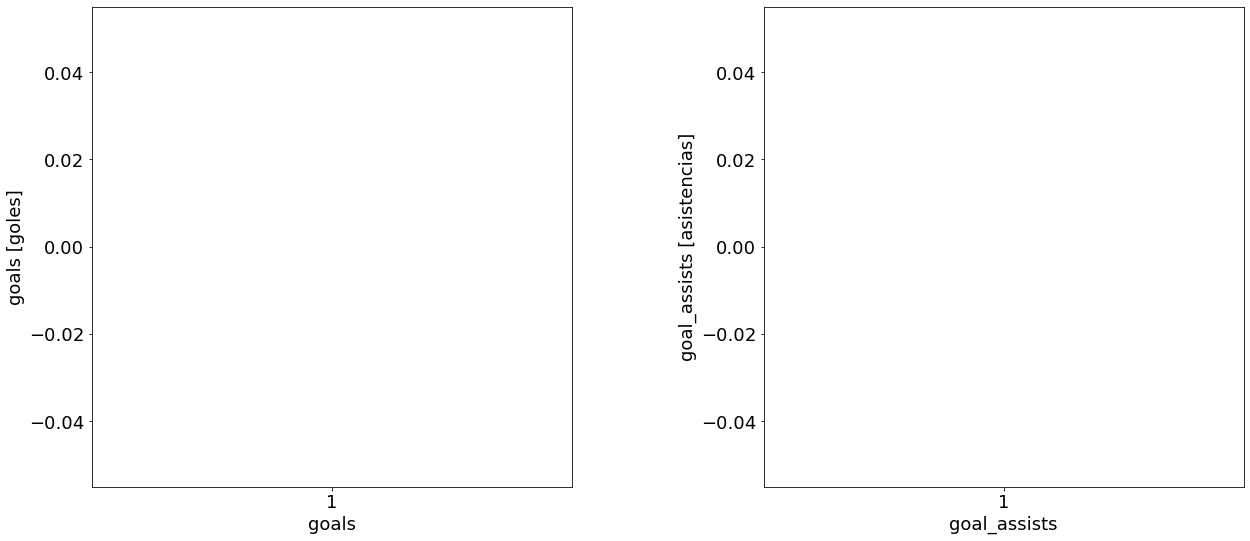

In [19]:
# Box plot 
units = ['goles', 'asistencias']

font = {'size': 18}

plt.rc('font', **font)

plt.figure(figsize=(20, 20))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

width = 2
height = 2
index = 1

for i in range(X.shape[1]):
    plt.subplot(height, width, index)

    plt.boxplot(X.iloc[:, i])
        
    plt.xlabel(X.columns[i])
    plt.ylabel(X.columns[i] + ' [' + str(units[i]) + ']')
        
    index = index + 1
    
plt.show()

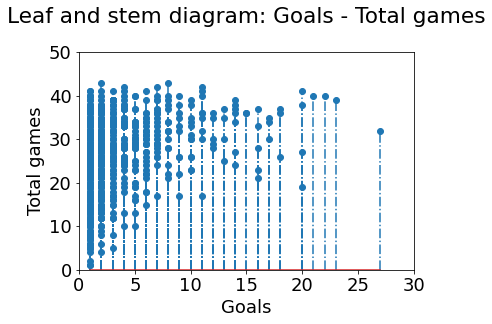

In [12]:
# leaf and stem diagram

marks = playersDatasetMinimized['games_played']
stems = playersDatasetMinimized['goals']
pylab.xlim([0,30])
pylab.ylim([0,50])
plot.xlabel('Goals')
plot.ylabel('Total games')
markerline, stemlines, baseline = plot.stem(stems, marks, '-.')
plot.title("Leaf and stem diagram: Goals - Total games\n")
plot.show()

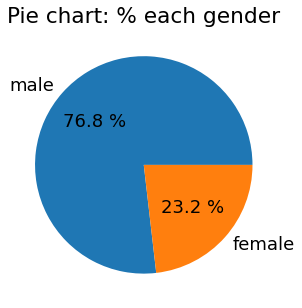

In [13]:
# Pie chart: % each gender
labels = 'male', 'female'
plt.figure(figsize=(10, 5))
plt.pie(playersDatasetMinimized['gender'].value_counts(), labels=labels, autopct="%0.1f %%")
plt.title("Pie chart: % each gender")
plt.show()

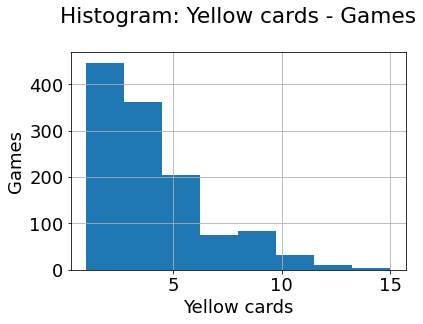

In [14]:
# Histogram: Yellow cards - Total games
playersDatasetMinimized['yellow_cards'].hist(bins=8) 

plt.xlabel("Yellow cards")
plt.ylabel("Games")
plt.title("Histogram: Yellow cards - Games\n")
plt.show()

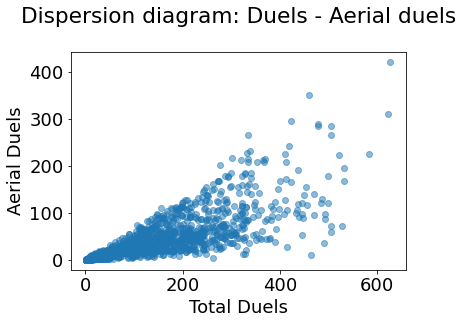

In [15]:
# Dispersion diagram: Duels - Aerial duels
x = playersDatasetMinimized['duels']
y = playersDatasetMinimized['aerial_duels']

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)
ax.set_xlabel('Total Duels')
ax.set_ylabel('Aerial Duels')
ax.set_title('Dispersion diagram: Duels - Aerial duels\n')
plt.show()

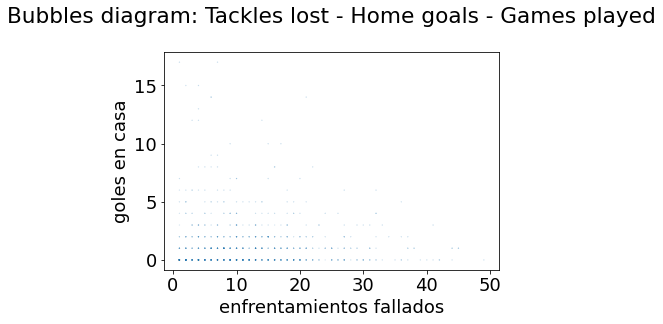

In [16]:
# Bubbles diagram: Tackles lost - Home goals - Games played
x = playersDatasetMinimized['tackles_lost']
y = playersDatasetMinimized['home_goals']
z = playersDatasetMinimized['games_played'] / 1000

fig, ax = plt.subplots()
ax.scatter(x, y, s=z, alpha=0.5)
ax.set_xlabel('enfrentamientos fallados')
ax.set_ylabel('goles en casa')
ax.set_title('Bubbles diagram: Tackles lost - Home goals - Games played\n')
plt.show()

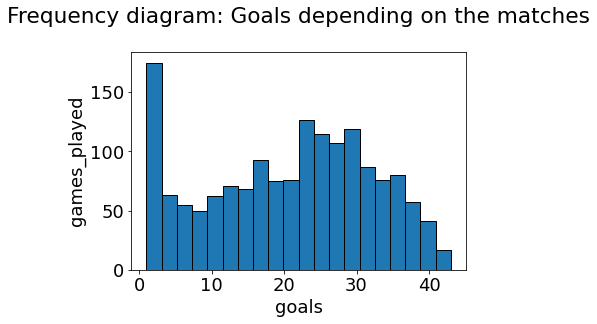

In [17]:
# Frequency diagram: Goals depending on the matches
data = playersDatasetMinimized['games_played']

fig, ax = plt.subplots()
ax.hist(data, bins=20, edgecolor='black')
ax.set_xlabel('goals')
ax.set_ylabel('games_played')
ax.set_title('Frequency diagram: Goals depending on the matches\n')
plt.show()

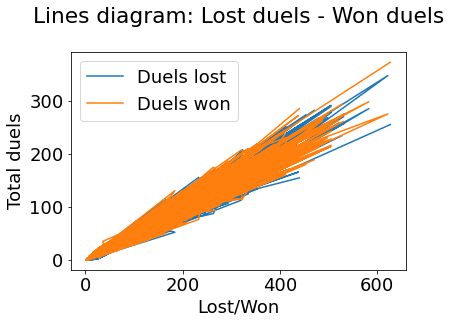

In [18]:
# Lines diagram: Lost duels - Won duels
x = playersDatasetMinimized['duels']
y1 = playersDatasetMinimized['duels_lost']
y2 = playersDatasetMinimized['duels_won']

fig, ax = plt.subplots()
ax.plot(x, y1, label='Duels lost')
ax.plot(x, y2, label='Duels won')
ax.set_xlabel('Lost/Won')
ax.set_ylabel('Total duels')
ax.set_title('Lines diagram: Lost duels - Won duels\n')
ax.legend()
plt.show()